# y = mx+c where m = b1(beta one) and c = bo(beta not)   --- bo+b1x

 # sometimes line of equation contains +e which is  error

# simple linear regression-- involves a single independent variable

In [45]:
from sklearn.linear_model import LinearRegression
print('done')

done


In [44]:
import pandas as pd

data = pd.DataFrame({
    "Hours":list(range(1,13)),
    "Score":[23,24,28,30,34,36,44,55,65,74,82,90]
} )

data                     

,Hours,Score
0,1,23
1,2,24
2,3,28
3,4,30
4,5,34
5,6,36
6,7,44
7,8,55
8,9,65
9,10,74


In [4]:
X = data[['Hours']]

X.head()

,Hours
0,1
1,2
2,3
3,4
4,5


In [5]:
y = data.Score
y.head()

0    23
1    24
2    28
3    30
4    34
Name: Score, dtype: int64

In [6]:
model = LinearRegression()

model.fit(X,y)


LinearRegression()

In [7]:
import warnings
warnings.filterwarnings('ignore')

hours = 9

predict_value = model.predict([[hours]])[0]
predict_value

64.7202797202797

In [8]:
y_pred = model.predict(X)
y_pred

array([13.61538462, 20.0034965 , 26.39160839, 32.77972028, 39.16783217,
       45.55594406, 51.94405594, 58.33216783, 64.72027972, 71.10839161,
       77.4965035 , 83.88461538])

In [9]:
model.score(X,y_pred)

1.0

In [10]:
c = model.intercept_
c

7.227272727272748

In [11]:
m = model.coef_[0]
m

6.388111888111885

In [12]:
model.predict([[5]])

array([39.16783217])

In [13]:
x = 5

y = m*x + c
y

39.167832167832174

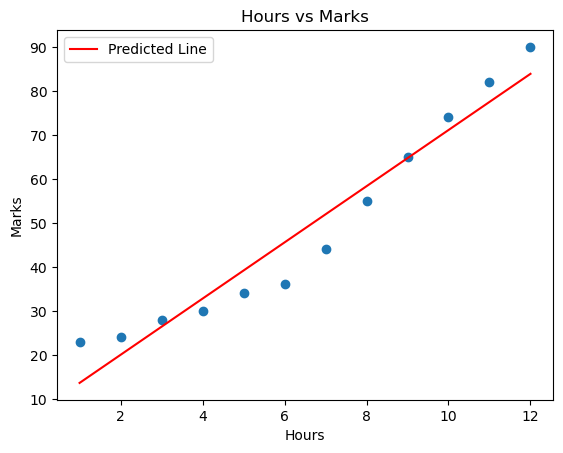

In [14]:
import matplotlib.pyplot as plt

X = data[['Hours']]
y = data.Score
plt.scatter(X,y)
plt.plot(X,y_pred,color = 'r', label = 'Predicted Line')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.title('Hours vs Marks')

plt.legend()
plt.show()

In [15]:
adv = pd.read_csv('advertising.csv')
adv.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [16]:
X = adv[['TV','Radio','Newspaper']]
X.sample()

,TV,Radio,Newspaper
103,187.9,17.2,17.9


In [17]:
y = adv['Sales']
y.sample()

63    14.0
Name: Sales, dtype: float64

In [18]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [19]:
y_pred = model.predict(X)
y_pred

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

In [20]:
model.score(X,y_pred)

1.0

In [21]:
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [22]:
model.intercept_

4.625124078808653

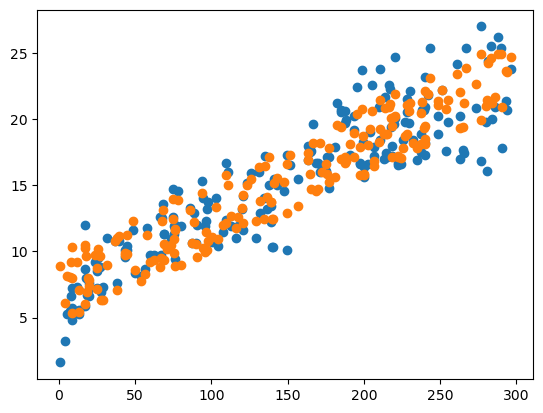

In [23]:
plt.scatter(adv['TV'],adv['Sales'])
plt.scatter(adv['TV'],y_pred)
plt.show()

In [24]:
import statsmodels.api as sm

In [25]:
print('done')

done


In [26]:
X = sm.add_constant(X)
X.head()

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


# ordinary least square which minimises error

In [27]:
model = sm.OLS(y,X).fit()
model

In [28]:
model.params

const        4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [29]:
y_pred = model.predict(X)
y_pred

0      21.220972
1      11.268248
2      10.496209
3      17.312447
4      15.644137
         ...    
195     7.105490
196    10.280941
197    15.259287
198    24.582220
199    18.185120
Length: 200, dtype: float64

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           8.13e-99
Time:                        09:50:11   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           8.13e-99
Time:                        09:50:12   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# decomposition variability

In [32]:
from sklearn.metrics import r2_score

In [33]:
y_pred = model.predict(X)

r2 = r2_score(y,y_pred)
print("R-squared:", r2)

R-squared: 0.9025912899684558


# r square depicts that how good the training is

metrics to evaluate modelm

 # mean absolute and squared error , root mean squared error, r-squared

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [35]:
mae = mean_absolute_error(y,y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 1.2363919943957846
MSE: 2.706006147627315
RMSE: 1.6449942697855562


# feature scaling

In [36]:
X.sample()

,const,TV,Radio,Newspaper
67,1.0,139.3,14.5,10.2


In [37]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
pd.DataFrame(X_scaled).sample()

,0,1,2,3
78,0.0,-1.653942,0.448086,-0.973757


# feature selection

In [39]:
from sklearn.feature_selection import RFE


model = LinearRegression()

selector = RFE(model, n_features_to_select=2)
selector = selector.fit(X,y)

print("Selected features:", selector.support_)
print("Feature ranking:", selector.ranking_)


Selected features: [False  True  True False]
Feature ranking: [3 1 1 2]


# regularisation -- prevents from overfitting and underfitting, involves 2 techniques lasso(l1) and ridge(l2)

In [40]:
from sklearn.linear_model import Ridge, Lasso

In [41]:
X = adv[['TV','Radio','Newspaper']]


ridge = Ridge(alpha=1.0)
ridge.fit(X,y)
print("m: ", ridge.coef_)
print("c: ", ridge.intercept_)

m:  [0.05444576 0.10699845 0.00033633]
c:  4.625171254003538


In [42]:
lasso = Lasso(alpha=1.0)
lasso.fit(X,y)
print("m: ", lasso.coef_)
print("c: ", lasso.intercept_)

m:  [0.05435555 0.10264474 0.        ]
c:  4.749996100634862


In [46]:
canada = pd.read_csv('canada_per_capita_income.csv')
canada

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [47]:
X = canada[['year']]
X

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [48]:
y = canada['per capita income (US$)']
y

0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: per capita income (US$), dtype: float64

In [49]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [50]:
y_pred=model.predict(X)
y_pred

array([ -134.55966672,   693.9054085 ,  1522.37048373,  2350.83555895,
        3179.30063417,  4007.7657094 ,  4836.23078462,  5664.69585984,
        6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 10635.48631118, 11463.9513864 , 12292.41646162,
       13120.88153685, 13949.34661207, 14777.81168729, 15606.27676251,
       16434.74183774, 17263.20691296, 18091.67198818, 18920.1370634 ,
       19748.60213863, 20577.06721385, 21405.53228907, 22233.9973643 ,
       23062.46243952, 23890.92751474, 24719.39258996, 25547.85766519,
       26376.32274041, 27204.78781563, 28033.25289085, 28861.71796608,
       29690.1830413 , 30518.64811652, 31347.11319175, 32175.57826697,
       33004.04334219, 33832.50841741, 34660.97349264, 35489.43856786,
       36317.90364308, 37146.3687183 , 37974.83379353])

In [51]:
model.score(X,y_pred)

1.0

In [52]:
model.intercept_

-1632210.7578554575

In [53]:
model.coef_

array([828.46507522])